In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('titanic1.csv')
data.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# dropping stupid features, Irrelevant features
columns_to_drop=['PassengerId','Name','Ticket','Cabin','Embarked']


data_clean= data.drop(columns_to_drop,axis=1)
data_clean.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_clean["Sex"]= le.fit_transform(data_clean["Sex"])
data_clean.head(n=5)
data_clean.info() # gives us all the info about our data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [5]:

data_clean= data_clean.fillna(data_clean['Age'].mean()) #fixed
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [6]:
input_cols=['Pclass','Sex','Age','SibSp','Parch','Fare']
# label
output_cols= ['Survived']

X=data_clean[input_cols]
Y=data_clean[output_cols]

In [7]:
print(X.shape)
print(Y.shape)

(891, 6)
(891, 1)


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 6)
(223, 6)
(668, 1)
(223, 1)


In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

In [11]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print("Testing Score:",clf.score(x_test,y_test))
print("Training Score:",clf.score(x_train,y_train))

Testing Score: 0.7623318385650224
Training Score: 0.9850299401197605


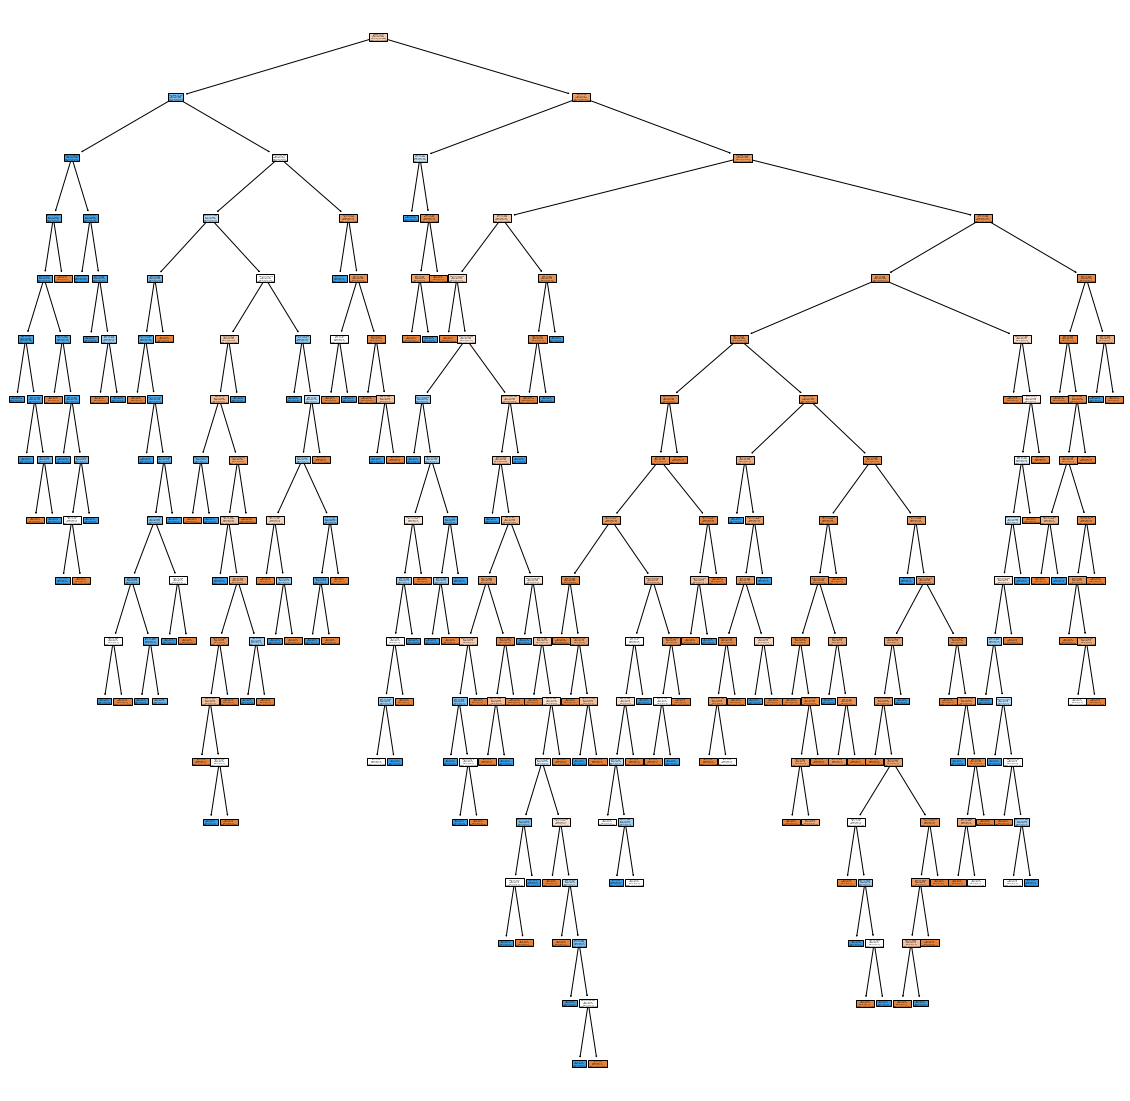

In [12]:
plt.figure(figsize=(20,20))
features = data_clean.columns
classes = ['Not Survived','Survived']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

#Tree is Overfit

In [15]:
#Post Pruning
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier



In [16]:
predd=clf.predict(x_test)
accuracy_score(y_test, predd)

0.7623318385650224

In [17]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [18]:

ccp_alphas

array([0.00000000e+00, 5.34644996e-05, 1.49700599e-04, 1.71086399e-04,
       2.41824044e-04, 2.99401198e-04, 4.40295879e-04, 4.99001996e-04,
       4.99001996e-04, 6.33348687e-04, 6.48702595e-04, 6.65335995e-04,
       8.87114660e-04, 8.89649273e-04, 8.98203593e-04, 9.26717993e-04,
       9.48103792e-04, 9.58083832e-04, 9.70281659e-04, 9.84872361e-04,
       9.98003992e-04, 1.02295409e-03, 1.12275449e-03, 1.12275449e-03,
       1.12275449e-03, 1.19760479e-03, 1.22482308e-03, 1.28314799e-03,
       1.31642310e-03, 1.32268358e-03, 1.33067199e-03, 1.37225549e-03,
       1.38134096e-03, 1.39720559e-03, 1.42529535e-03, 1.48849698e-03,
       1.56819229e-03, 1.66725373e-03, 1.72916200e-03, 1.79640719e-03,
       1.79640719e-03, 1.91096504e-03, 1.99600798e-03, 2.07917498e-03,
       2.08152276e-03, 2.22938738e-03, 2.24113177e-03, 2.39520958e-03,
       2.42666840e-03, 2.55738523e-03, 2.64177527e-03, 2.74278672e-03,
       2.75023771e-03, 3.89340255e-03, 4.03359947e-03, 4.74691642e-03,
      

In [19]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15077252380034933


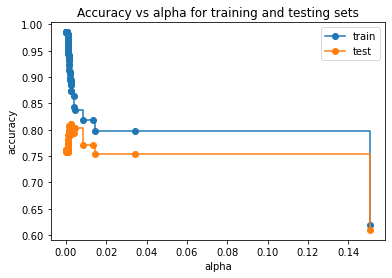

In [20]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [21]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [22]:
preddd=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preddd)

0.7713004484304933

[Text(342.40909090909093, 475.65000000000003, 'X[1] <= 0.5\ngini = 0.472\nsamples = 668\nvalue = [413, 255]'),
 Text(152.1818181818182, 339.75, 'X[0] <= 2.5\ngini = 0.361\nsamples = 228\nvalue = [54, 174]'),
 Text(76.0909090909091, 203.85000000000002, 'gini = 0.075\nsamples = 128\nvalue = [5, 123]'),
 Text(228.27272727272728, 203.85000000000002, 'gini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(532.6363636363636, 339.75, 'X[2] <= 9.5\ngini = 0.3\nsamples = 440\nvalue = [359, 81]'),
 Text(380.4545454545455, 203.85000000000002, 'X[3] <= 2.5\ngini = 0.488\nsamples = 26\nvalue = [11, 15]'),
 Text(304.3636363636364, 67.94999999999999, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(456.54545454545456, 67.94999999999999, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(684.8181818181819, 203.85000000000002, 'X[0] <= 1.5\ngini = 0.268\nsamples = 414\nvalue = [348, 66]'),
 Text(608.7272727272727, 67.94999999999999, 'gini = 0.458\nsamples = 90\nvalue = [58, 32]'),
 Text(760.9090909

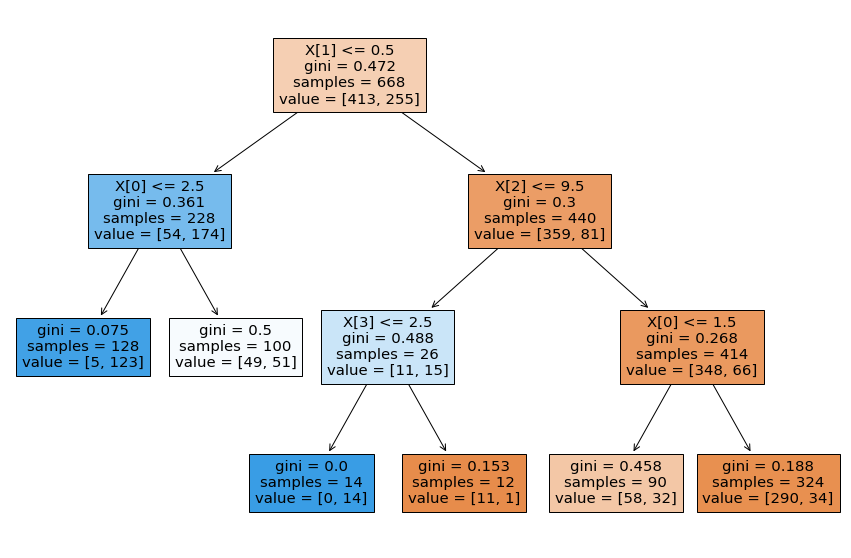

In [23]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)